# Position in a system with rotating parts

[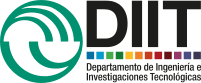](https://ingenieria.unlam.edu.ar/)   
[by-nc-sa_80x15.png](https://creativecommons.org/licenses/by-sa/4.0/)
2025
[Víctor A. Bettachini](mailto:vbettachini@unlam.edu.ar)   

---

## Instructions | Spring coiled around a T-shaped arm
The T-shaped device shown in the figure is connected by a rod of length $\ell$ to a pivot point.
The T spins over an horizontal plane with constant angular speed $\omega$.
A particle of mass $m$ much larger than that of the T (so that the mass of the T can be neglected) can slide freely over the perpendicular arm on the T, attached to the end of a spring of constant $k$ and zero natural length, that is connected to the joint of the T-arm.
1. Find a dynamic equation in terms of $d$, the distance between the particle and the joint.  
1. Chose any initial conditions and find $d(t)$. 
1. There exists a ``special value`` for $\omega$. What is this value and how it relates to $d(t)$?

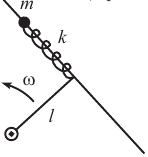

## Physical parameters for the system

In [1]:
import sympy as sm # import functions for symbolic manipulations
from sympy.physics import mechanics as me # from sympy we use functions for mechanics
me.init_vprinting() # dot notation for velocity and acceleration

In [2]:
m, k, omega, l = sm.symbols('m, k, \omega, \ell', positive=True) # Parameters for this system

# We define the generalized coordinates
e = me.ReferenceFrame('e') # Cartesian frame of reference
t = sm.symbols('t') # time

## Option 1: work using a fixed frame of reference.

There are two things to define
- the spring's length, related to $d$
- the position of the particle of mass $m$

The pivot point around which the T spins can be the origin of the frame of reference $e$, with versor $\hat{x}$ directed to the right and $\hat{y}$ directed upward.
The particle's position vector is the sum of the vector from pivot point to the joint and the vector for the position of the spring with respect to the joint.
The position of the joint is

In [3]:
vertex_r = l* (sm.cos(omega * t) * e.x + sm.sin(omega * t) * e.y) # joint's position

It's not hard to interpret the geometry to determine the projections of the vector for the spring on the selected axes.

In [4]:
d = me.dynamicsymbols('d') # the only generalized coordinate | distance from particle to joint
particle_r = vertex_r + d* (-sm.sin(omega * t) * e.x + sm.cos(omega * t) * e.y) # particles's position
particle_r

## Option 2: rotating frame of reference
We device a cartesian frame of reference where $\hat{e}_x$ is directed to the right and $\hat{e}_y$ is directed upward.

If at $t=0$ the segment of length $l$ coincides with the horizontal, and it is directed to the right of the pivot point, the particle's position will be

In [5]:
particle_r = l* e.x + d* e.y
particle_r

Such a 3D vector can be expressed in matrix notation as

In [6]:
particle_r_matrix = sm.Matrix([[l], [d], [0]])
particle_r_matrix

⎡\ell⎤
⎢    ⎥
⎢ d  ⎥
⎢    ⎥
⎣ 0  ⎦

The effect of the constant angular speed $\omega \hat{z}$ can be represented by a rotation matrix using the angle $\omega t$ around $\hat{z}$.

In [7]:
matrixRotation = sm.Matrix([[sm.cos(omega* t), -sm.sin(omega* t), 0], [ sm.sin(omega* t), sm.cos(omega* t), 0], [0,0,1] ] )
matrixRotation

⎡cos(\omega⋅t)  -sin(\omega⋅t)  0⎤
⎢                                ⎥
⎢sin(\omega⋅t)  cos(\omega⋅t)   0⎥
⎢                                ⎥
⎣      0              0         1⎦

Direct multiplication allows us to find the components $\hat{x}$ y $\hat{y}$ of the particle's position at any $t$.

In [8]:
matrixRotation* particle_r_matrix

⎡\ell⋅cos(\omega⋅t) - d⋅sin(\omega⋅t)⎤
⎢                                    ⎥
⎢\ell⋅sin(\omega⋅t) + d⋅cos(\omega⋅t)⎥
⎢                                    ⎥
⎣                 0                  ⎦

### Process automation

There is no need to manually write the particle's position in a matrix format after writing the particle's position vector at $t=0$.
There is a function in `SymPy.physics.mechanics` that converts the vector into this format.

In [9]:
particle_r.to_matrix(e)

⎡\ell⎤
⎢    ⎥
⎢ d  ⎥
⎢    ⎥
⎣ 0  ⎦

In the same fashion, there is a function in SymPy which saves us the work of writing the rotation matrix manually.

**Be careful!** SymPy uses the final frame of reference, so we have to indicate a rotation in the opposite direction than that of the device.

In [10]:
sm.rot_axis3(- omega* t) # there are variants of "axis" for axes 1 and 2

⎡cos(\omega⋅t)  -sin(\omega⋅t)  0⎤
⎢                                ⎥
⎢sin(\omega⋅t)  cos(\omega⋅t)   0⎥
⎢                                ⎥
⎣      0              0         1⎦

Therefore, the procedure of rotating the original vector could be done in a single line using these functions.

In [11]:
rotated = sm.rot_axis3(- omega* t)* particle_r.to_matrix(e)
rotated

⎡\ell⋅cos(\omega⋅t) - d⋅sin(\omega⋅t)⎤
⎢                                    ⎥
⎢\ell⋅sin(\omega⋅t) + d⋅cos(\omega⋅t)⎥
⎢                                    ⎥
⎣                 0                  ⎦

The reversed operation is carried out manually by multiplying each component times the corresponding versor in the chosen frame of reference

In [12]:
rotated_vector = rotated[0]* e.x+ rotated[1]* e.y+ rotated[2]* e.z
rotated_vector

reaching the same result as in the other option.